In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
import xgboost as xgb

In [10]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
from sklearn.metrics import classification_report

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
from sklearn.pipeline import Pipeline


In [18]:
from sklearn.model_selection import GridSearchCV


In [19]:
from sklearn.metrics import classification_report


In [20]:
from sklearn.svm import SVC

In [21]:
df=pd.read_csv("Laptop Price data.csv")


In [22]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [23]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1
892,930,1019,Asus,TUF Gaming A15 2023 FA577XU-LP041WS Gaming Laptop,131990,84.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16GB,DDR4,1TB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


In [24]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [25]:
df=df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   name               893 non-null    object 
 2   price              893 non-null    int64  
 3   spec_rating        893 non-null    float64
 4   processor          893 non-null    object 
 5   CPU                893 non-null    object 
 6   Ram                893 non-null    object 
 7   Ram_type           893 non-null    object 
 8   ROM                893 non-null    object 
 9   ROM_type           893 non-null    object 
 10  GPU                893 non-null    object 
 11  display_size       893 non-null    float64
 12  resolution_width   893 non-null    float64
 13  resolution_height  893 non-null    float64
 14  OS                 893 non-null    object 
 15  warranty           893 non-null    int64  
dtypes: float64(4), int64(2), o

In [27]:
df.describe()

,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spec_rating'>

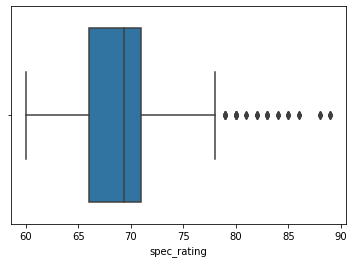

In [28]:
sns.boxplot(df['spec_rating'])

In [29]:
q1=df['spec_rating'].quantile(0.25)

In [30]:
q3=df['spec_rating'].quantile(0.75)

In [31]:
IQR=q3-q1

In [32]:
lower=q1-1.5*IQR

In [33]:
upper=q3+1.5*IQR

In [34]:
df=df[(df['spec_rating']>lower) & (df['spec_rating']<upper)]

In [35]:
df

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Acer,Aspire Vero AV14-52P NX.KJTSI.002 Laptop,49990,69.323529,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",16GB,LPDDR4X,512GB,SSD,Intel Integrated UHD,14.0,1920.0,1080.0,Windows OS,1
887,Acer,Aspire 5 A515-58M NX.KHGSI.002 Gaming Laptop,56990,69.323529,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,15.6,1920.0,1080.0,Windows 11 OS,1
888,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1


In [36]:
df['warranty'].value_counts()

1    766
2     49
3      9
0      6
Name: warranty, dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='warranty', ylabel='count'>

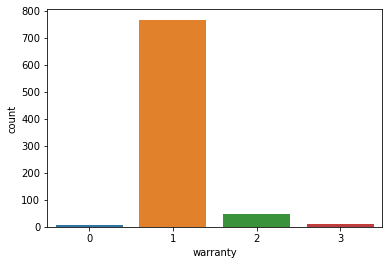

In [37]:
sns.countplot(df['warranty'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='display_size'>

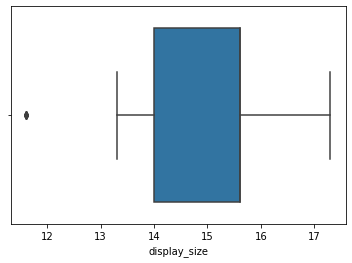

In [38]:
sns.boxplot(df['display_size'])

In [39]:
q1=df['display_size'].quantile(0.25)

In [40]:
q3=df['display_size'].quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
upper=q3+1.5*IQR

In [44]:
df=df[(df['display_size']>lower) & (df['display_size']<upper)]

In [45]:
df

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Acer,Aspire Vero AV14-52P NX.KJTSI.002 Laptop,49990,69.323529,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",16GB,LPDDR4X,512GB,SSD,Intel Integrated UHD,14.0,1920.0,1080.0,Windows OS,1
887,Acer,Aspire 5 A515-58M NX.KHGSI.002 Gaming Laptop,56990,69.323529,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,15.6,1920.0,1080.0,Windows 11 OS,1
888,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resolution_width'>

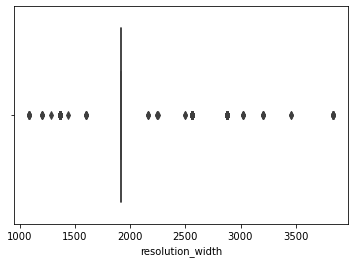

In [46]:
sns.boxplot(df['resolution_width'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resolution_height'>

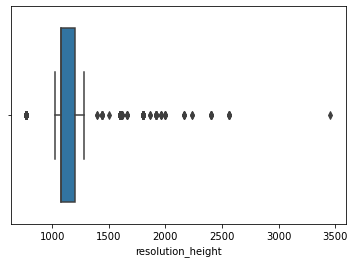

In [47]:
sns.boxplot(df['resolution_height'])

In [48]:
q1=df['resolution_height'].quantile(0.25)

In [49]:
q3=df['resolution_height'].quantile(0.75)

In [50]:
IQR=q3-q1

In [51]:
lower=q1-1.5*IQR

In [52]:
upper=q3+1.5*IQR

In [53]:
df=df[(df['resolution_height']>lower) & (df['resolution_height']<upper)]

In [54]:
df

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
5,Acer,Extensa EX214-53 Laptop,39990,62.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
6,Dell,Inspiron 3520 D560896WIN9B Laptop,36790,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Dell,G15-5530 2023 Gaming Laptop,125699,75.000000,13th Gen Intel Core i7 13650HX,14 Cores (6P + 8E),16GB,DDR5,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1
886,Acer,Aspire Vero AV14-52P NX.KJTSI.002 Laptop,49990,69.323529,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",16GB,LPDDR4X,512GB,SSD,Intel Integrated UHD,14.0,1920.0,1080.0,Windows OS,1
887,Acer,Aspire 5 A515-58M NX.KHGSI.002 Gaming Laptop,56990,69.323529,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,15.6,1920.0,1080.0,Windows 11 OS,1
888,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='warranty'>

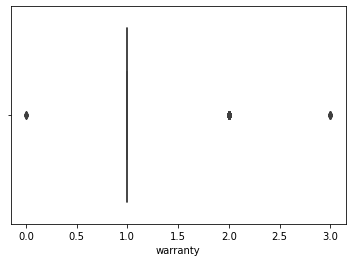

In [55]:
sns.boxplot(df['warranty'])

In [56]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
5,Acer,Extensa EX214-53 Laptop,39990,62.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
6,Dell,Inspiron 3520 D560896WIN9B Laptop,36790,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1


In [57]:
le=LabelEncoder()


In [58]:
col=['name','processor','CPU','Ram','Ram_type','ROM','ROM_type','GPU','OS','brand']

In [59]:
for i in col:
    if i in df.columns:
        df[i]=le.fit_transform(df[i])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_2308\1475264598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])


In [60]:
df

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,8,481,49900,73.000000,86,14,4,1,3,1,7,15.6,1920.0,1080.0,5,1
1,8,31,39900,60.000000,28,13,4,1,3,1,89,15.6,1920.0,1080.0,5,1
2,1,317,26990,69.323529,12,12,4,1,3,1,86,14.0,1920.0,1080.0,5,1
5,1,116,39990,62.000000,33,3,4,1,3,1,86,14.0,1920.0,1080.0,5,1
6,5,233,36790,60.000000,28,13,4,1,3,1,89,15.6,1920.0,1080.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,5,121,125699,75.000000,59,4,1,3,3,1,35,15.6,1920.0,1080.0,5,1
886,1,78,49990,69.323529,45,13,1,5,3,1,78,14.0,1920.0,1080.0,6,1
887,1,65,56990,69.323529,47,0,1,7,3,1,77,15.6,1920.0,1080.0,5,1
888,2,528,44990,69.323529,65,13,4,1,3,1,63,15.6,1920.0,1080.0,5,1


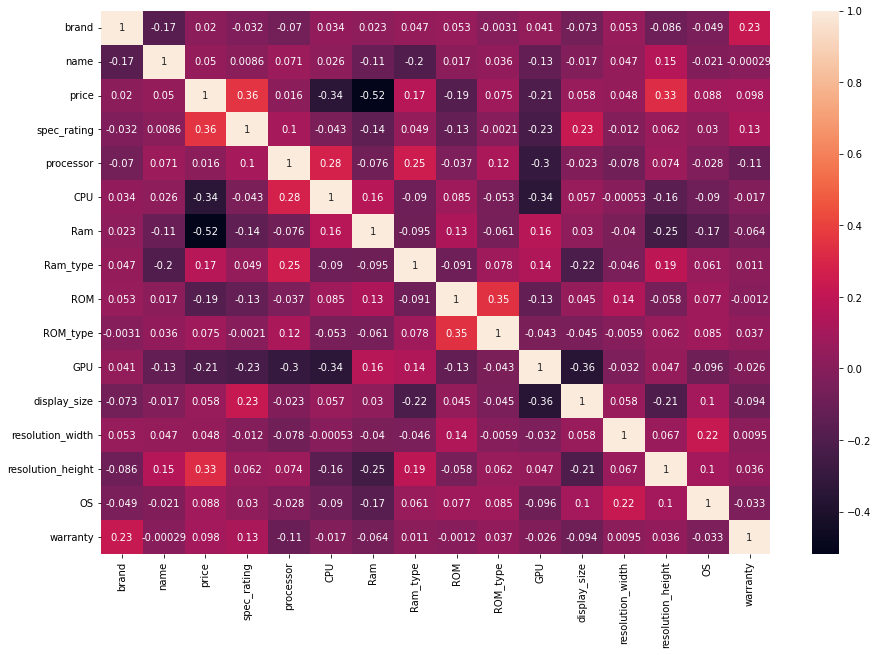

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [62]:
X=df.drop('warranty',axis=1)

In [63]:
y=df['warranty']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# BalancedRandomForestClassifier

In [66]:
rfr=BalancedRandomForestClassifier()


In [67]:
rfr.fit(X_train,y_train)

C:\Users\himanshu\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\himanshu\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier()

In [68]:
y_pred=rfr.predict(X_train)


In [69]:
accuracy_score(y_train,y_pred)

0.6120527306967984

In [70]:
y_pred=rfr.predict(X_test)


In [71]:
accuracy_score(y_test,y_pred)

0.6090225563909775

In [72]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

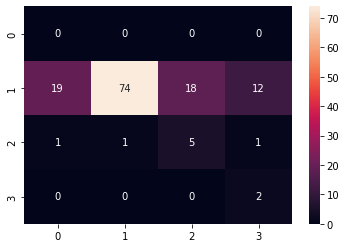

In [73]:
sns.heatmap(cm,annot=True,fmt='d')

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.99      0.60      0.75       123
           2       0.22      0.62      0.32         8
           3       0.13      1.00      0.24         2

    accuracy                           0.61       133
   macro avg       0.33      0.56      0.33       133
weighted avg       0.93      0.61      0.71       133



C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNeighborsClassifier

In [75]:
knr=KNeighborsClassifier()


In [76]:
knr.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred=knr.predict(X_train)


In [78]:
accuracy_score(y_train,y_pred)

0.9246704331450094

In [79]:
y_pred=knr.predict(X_test)


In [80]:
accuracy_score(y_test,y_pred)

0.9172932330827067

In [81]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

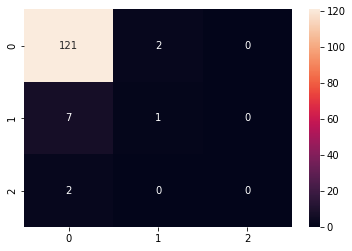

In [82]:
sns.heatmap(cm,annot=True,fmt='d')

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      0.98      0.96       123
           2       0.33      0.12      0.18         8
           3       0.00      0.00      0.00         2

    accuracy                           0.92       133
   macro avg       0.42      0.37      0.38       133
weighted avg       0.88      0.92      0.90       133



C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBClassifier

In [84]:
xgb_i=xgb.XGBClassifier()

In [85]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [86]:
y_pred=xgb_i.predict(X_train)


In [87]:
accuracy_score(y_train,y_pred)

1.0

In [88]:
y_pred=xgb_i.predict(X_test)


In [89]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [90]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

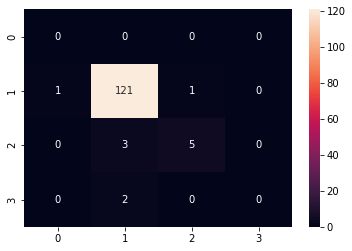

In [91]:
sns.heatmap(cm,annot=True,fmt='d')

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.96      0.98      0.97       123
           2       0.83      0.62      0.71         8
           3       0.00      0.00      0.00         2

    accuracy                           0.95       133
   macro avg       0.45      0.40      0.42       133
weighted avg       0.94      0.95      0.94       133



C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\

# LogisticRegression

In [93]:
lr=LogisticRegression()


In [94]:
lr.fit(X_train,y_train)

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred=lr.predict(X_train)


In [96]:
accuracy_score(y_train,y_pred)

0.9227871939736346

In [97]:
y_pred=lr.predict(X_test)


In [98]:
accuracy_score(y_test,y_pred)

0.924812030075188

In [99]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

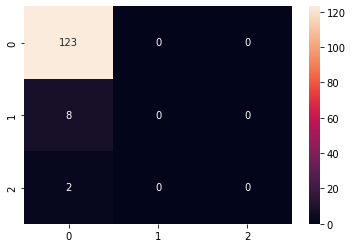

In [100]:
sns.heatmap(cm,annot=True,fmt='d')

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96       123
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2

    accuracy                           0.92       133
   macro avg       0.31      0.33      0.32       133
weighted avg       0.86      0.92      0.89       133



C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DecisionTreeClassifier

In [102]:
dtr=DecisionTreeClassifier()


In [103]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [104]:
y_pred=dtr.predict(X_train)


In [105]:
accuracy_score(y_train,y_pred)

1.0

In [106]:
y_pred=dtr.predict(X_test)


In [107]:
accuracy_score(y_test,y_pred)

0.8947368421052632

In [108]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

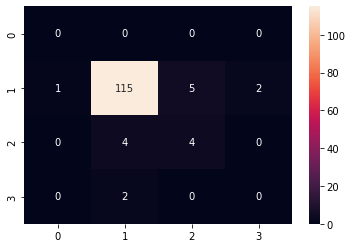

In [109]:
sns.heatmap(cm,annot=True,fmt='d')

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      0.93      0.94       123
           2       0.44      0.50      0.47         8
           3       0.00      0.00      0.00         2

    accuracy                           0.89       133
   macro avg       0.35      0.36      0.35       133
weighted avg       0.91      0.89      0.90       133



C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\himanshu\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\himanshu\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\himanshu\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  w

scaledLR
0.9209486862987127
scaledKNN
0.934050432022571
scaledDT
0.9396755422324106
scaledXGB
0.9566390407335567
scaledRFC
0.5443308058543467
scaledSVC
0.9321636395697409


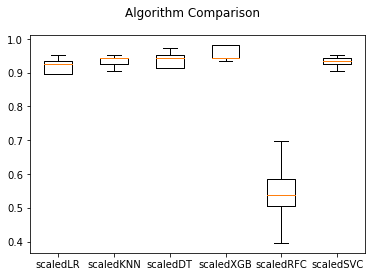

In [111]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledXGB' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,xgb.XGBClassifier())]))))
pipelines.append(('scaledRFC' , (Pipeline([('scaled' , StandardScaler()),('RFC' ,BalancedRandomForestClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC())]))))


model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=5)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold)
    results.append(crossv_results)
    model_name.append(pipe)

for i,j in zip(results,model_name):
    print(j)
    print(i.mean())
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

In [112]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(15,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [113]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [114]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
17/17 [==============================] - 1s 3ms/step - loss: 8701.5615 - accuracy: 0.0056
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 5250.5312 - accuracy: 0.0056
Epoch 3/10
17/17 [==============================] - 0s 2ms/step - loss: 1682.1499 - accuracy: 0.0339
Epoch 4/10
17/17 [==============================] - 0s 2ms/step - loss: -78.8008 - accuracy: 0.9002
Epoch 5/10
17/17 [==============================] - 0s 2ms/step - loss: -157.5490 - accuracy: 0.9228
Epoch 6/10
17/17 [==============================] - 0s 2ms/step - loss: -205.8880 - accuracy: 0.9228
Epoch 7/10
17/17 [==============================] - 0s 2ms/step - loss: -272.1354 - accuracy: 0.9228
Epoch 8/10
17/17 [==============================] - 0s 2ms/step - loss: -349.1433 - accuracy: 0.9228
Epoch 9/10
17/17 [==============================] - 0s 1ms/step - loss: -437.0634 - accuracy: 0.9228
Epoch 10/10
17/17 [==============================] - 0s 1ms/step - loss: -525.1921 - accurac

In [115]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: -707.9579 - accuracy: 0.9248


[-707.9579467773438, 0.9248120188713074]

In [116]:
y_pred=model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [117]:
y_pred[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [118]:
y_test[:10]

365    1
378    1
632    1
291    1
584    1
466    1
868    1
623    1
833    1
111    2
Name: warranty, dtype: int64

In [119]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [120]:
ypred[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]